# 1. Install Dependencies and Bring in Data

In [1]:
!pip install tensorflow pandas matplotlib scikit-learn

In [2]:
import os # help work with diffrent file path with os.pathfile.join()
import pandas as pd # pandas help read in tabular dtaa like csv or text files
import tensorflow as tf #deep learning framework we will use specifically keras under the hood
import numpy as np # we will use ito to wrap our informstion into another batch/set of arrays, If we got one sample in our batch 
#and we want to pass it through our deep learning model np.expand_dims would be very helpful

In [3]:
train_path = os.path.join('data', 'sectiontitles - TransformedData.csv')

# Read the CSV files
train_df = pd.read_csv(train_path)


In [4]:
train_df.head()

,Identifier,Sentence,Category1,basic qualifications,physical demands,experience,preferred qualifications,schedule,additional information,policy,licenses certifications,salary,job description,disclaimer,location,education,company description,training,benefits
0,011dd05f9943d885,main responsibility,basic qualifications,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,011dd05f9943d885,qualification experience,basic qualifications,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,011dd05f9943d885,additional require ability,basic qualifications,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,011dd05f9943d885,benefit,benefits,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,011dd05f9943d885,schedule,schedule,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.tail()

,Identifier,Sentence,Category1,basic qualifications,physical demands,experience,preferred qualifications,schedule,additional information,policy,licenses certifications,salary,job description,disclaimer,location,education,company description,training,benefits
2637,6031676ff6f95281,benefit summary,benefits,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2638,6031676ff6f95281,submission guideline,additional information,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2639,21c1836b5c7f2e84,about global dwelling,company description,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2640,21c1836b5c7f2e84,a day in the life of a warehouse coordinator,job description,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2641,21c1836b5c7f2e84,qualification for a warehouse coordinator,basic qualifications,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


.illoc is a part of pandas and  allows for integer-location-based indexing for selection by position. It enables one to select rows and columns from a DataFrame by their integer positions, similar to how one would with a list or array.

In [6]:
train_df.iloc[0]

Identifier                      011dd05f9943d885
Sentence                     main responsibility
Category1                   basic qualifications
basic qualifications                           1
physical demands                               0
experience                                     0
preferred qualifications                       0
schedule                                       0
additional information                         0
policy                                         0
licenses  certifications                       0
salary                                         0
job description                                0
disclaimer                                     0
location                                       0
education                                      0
company description                            0
training                                       0
benefits                                       0
Name: 0, dtype: object

In [7]:
train_df.iloc[657]['Sentence']

'responsibility'

In [8]:
train_df[train_df.columns[1:]].iloc[3]

Sentence                     benefit
Category1                   benefits
basic qualifications               0
physical demands                   0
experience                         0
preferred qualifications           0
schedule                           0
additional information             0
policy                             0
licenses  certifications           0
salary                             0
job description                    0
disclaimer                         0
location                           0
education                          0
company description                0
training                           0
benefits                           1
Name: 3, dtype: object

# 2. Preprocess

In [9]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
aiobotocore                   2.7.0
aiohttp                       3.9.0
aioitertools                  0.7.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.7.0
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
archspec                      0.2.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.3.4
asttokens                     2.0.5
astunparse   

In [10]:
# this makes tokenization so much easier
from tensorflow.keras.layers import TextVectorization
#a preprocessing layer which maps text features to integer sequences, essentially we take a word and convert it to a code.

In [11]:
train_df.columns

Index(['Identifier', 'Sentence', 'Category1', 'basic qualifications',
       'physical demands', 'experience', 'preferred qualifications',
       'schedule', 'additional information', 'policy',
       'licenses  certifications', 'salary', 'job description', 'disclaimer',
       'location', 'education', 'company description', 'training', 'benefits'],
      dtype='object')

In [12]:
train_df['Sentence']

0                                main responsibility
1                           qualification experience
2                         additional require ability
3                                            benefit
4                                           schedule
                            ...                     
2637                                 benefit summary
2638                            submission guideline
2639                           about global dwelling
2640    a day in the life of a warehouse coordinator
2641       qualification for a warehouse coordinator
Name: Sentence, Length: 2642, dtype: object

In [13]:
train_df[train_df.columns[3:]]

,basic qualifications,physical demands,experience,preferred qualifications,schedule,additional information,policy,licenses certifications,salary,job description,disclaimer,location,education,company description,training,benefits
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2638,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2639,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2640,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
train_df[train_df.columns[2:]].values

array([['basic qualifications', 1, 0, ..., 0, 0, 0],
       ['basic qualifications', 1, 0, ..., 0, 0, 0],
       ['basic qualifications', 1, 0, ..., 0, 0, 0],
       ...,
       ['company description', 0, 0, ..., 1, 0, 0],
       ['job description', 0, 0, ..., 0, 0, 0],
       ['basic qualifications', 1, 0, ..., 0, 0, 0]], dtype=object)

In [15]:
X = train_df['Sentence'] #sentences
y = train_df[train_df.columns[3:]].values #y batch represents our different labels

In [16]:
X

0                                main responsibility
1                           qualification experience
2                         additional require ability
3                                            benefit
4                                           schedule
                            ...                     
2637                                 benefit summary
2638                            submission guideline
2639                           about global dwelling
2640    a day in the life of a warehouse coordinator
2641       qualification for a warehouse coordinator
Name: Sentence, Length: 2642, dtype: object

In [17]:
MAX_FEATURES= 10000# maximum number of words in vocab

In [18]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=180,#each sentence we take from the dataset will be capped at 180 words
                               output_mode='int')# how we want our output to look in this case integer

2024-07-25 18:37:24.369815: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-25 18:37:24.369868: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-25 18:37:24.369885: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-25 18:37:24.369957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-25 18:37:24.369986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
X.values #convert from pandas series(just the one column from data set) into a numpy array

array(['main responsibility', 'qualification experience',
       'additional require ability', ..., 'about global dwelling',
       'a day in the life of a warehouse coordinator',
       'qualification for a warehouse coordinator'], dtype=object)

In [20]:
vectorizer.adapt(X.values)

In [21]:
vectorizer('a day in the life')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 21, 156,  23,   3, 226])>

In [22]:
vocab = vectorizer.get_vocabulary()
print(len(vocab))  # Should be <= MAX_FEATURES
print(vocab[:10])  # Print first 10 words in the vocabulary

963
['', '[UNK]', 'and', 'the', 'qualification', 'job', 'of', 'responsibility', 'to', 'be']


In [23]:
vectorized_text = vectorizer(X.values)
#pass through all our x.values to our vectorizer and what we get back is a dataset called vectorized_text.
#Esseentially it will go through every single word and tokenize that .

In [24]:
vectorized_text
#we have 2642 samples and we capped it to 180 words
#If a particular sentence doesnt meet that max it just fills/pads out the rest of the rows/subarrays with 0s.

<tf.Tensor: shape=(2642, 180), dtype=int64, numpy=
array([[399,   7,   0, ...,   0,   0,   0],
       [  4,  11,   0, ...,   0,   0,   0],
       [ 57,  24,  31, ...,   0,   0,   0],
       ...,
       [ 16, 537, 555, ...,   0,   0,   0],
       [ 21, 156,  23, ...,   0,   0,   0],
       [  4,  17,  21, ...,   0,   0,   0]])>

We have gone and brought in our text vectorization layer and created our X and Y variables,  We have also instantiated our text vectorization data and trained it to be able to learn our vocabulary and we have gone and vectorized(vector tokenized our dataset). Now we will create a TensorFlow data pipeline, this will make it a lot easier. When it comes to learning and training our deep learning model especially when you have data that can't fit into memory.

In [25]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))#create our data step and then each step applies a subsequent data preprocesisng step
#vectorized_text is our input feature and y is our target variable
dataset = dataset.cache() #caches data
dataset = dataset.shuffle(3000)#shufle it and then pass through how large our buffer size must be
dataset = dataset.batch(16) #this batches it up so eahc batch is 16 samples
dataset = dataset.prefetch(8) # helps bottlenecks

In [26]:
dataset.as_numpy_iterator().next()#gets one batch

(array([[ 25,  51,  40, ...,   0,   0,   0],
        [ 82, 157,   0, ...,   0,   0,   0],
        [ 84,  20,   9, ...,   0,   0,   0],
        ...,
        [ 13,   6,   3, ...,   0,   0,   0],
        [ 44,   0,   0, ...,   0,   0,   0],
        [ 25,   0,   0, ...,   0,   0,   0]]),
 array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0

Batch is represented as the text in its vectorized format plus all the labels.

In [27]:
batch_X,batch_y=dataset.as_numpy_iterator().next()

In [28]:
batch_X.shape #16 samples eahc maxed at 180 words

(16, 180)

In [29]:
batch_y.shape # 16 samples represented as a 1d vector

(16, 16)

In [30]:
len(dataset)*16 # number of samples

2656

In [31]:
int(len(dataset)*.7)

116

In [32]:
'''
train = dataset.take(int(len(dataset)*.7)) # 70 percent to our traning partition
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))# 20 percent validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))#10 percent testing
'''
train = dataset.take(int(len(dataset) * 0.6))
val = dataset.skip(int(len(dataset) * 0.6)).take(int(len(dataset) * 0.2))
test = dataset.skip(int(len(dataset) * 0.8)).take(int(len(dataset) * 0.2))


In [33]:
train_generator= train.as_numpy_iterator()# generates batch from training partition

In [34]:
train_generator.next()

(array([[82, 10,  2, ...,  0,  0,  0],
        [ 7,  0,  0, ...,  0,  0,  0],
        [24,  4,  0, ...,  0,  0,  0],
        ...,
        [18,  0,  0, ...,  0,  0,  0],
        [38, 19,  7, ...,  0,  0,  0],
        [74, 43,  0, ...,  0,  0,  0]]),
 array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

 So when we acutally train our deep learning model, it will pass through a a batch which will go into a forward pass then a backward pass then go and update the gradients then it will go to the next batch(through .next()) and then do the same thing

In [35]:
## got from previous work
''''
import pandas as pd

# Assuming df is your DataFrame and the column of interest is the third column (index 2)
column_of_interest = train_df.columns[2]

# Generate a set of unique category labels from the specified column
category_labels = set(category for category in train_df[column_of_interest].unique() if not pd.isna(category))

print(category_labels)
'''

"'\nimport pandas as pd\n\n# Assuming df is your DataFrame and the column of interest is the third column (index 2)\ncolumn_of_interest = train_df.columns[2]\n\n# Generate a set of unique category labels from the specified column\ncategory_labels = set(category for category in train_df[column_of_interest].unique() if not pd.isna(category))\n\nprint(category_labels)\n"

# 

# Create our Sequential Model

Our first layer is an embedding layer.The embedding that maps to a word knows a lot about that word. For our use case during training the network it might learn which words are positive negative,subjective,objective, similar to a personality test for a word, it tells us all about the word which makes it useful for deep learning.
We will use the sequential api for this.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Input# our different layers
#the layers we use to build our DNN. We start with our LSTM layers and the Bidirectional layer will be a modifier on top of that will allow us to pass in features or values
#from our lstm outputs across the board as we are passing through our sequences. Dropout is a method of regularization and the dense layer is lastly our fully connected layer.
# we are gonna be passing in our sequences through our embedding, so we dont need to pass through a preexisting embedding our 
#dnn is going to learn all fo the features it will need in that particular embedding

In [36]:
y.shape

(2642, 16)

In [37]:
?Embedding

Init signature:
Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range.

Example:

>>> model = keras.Sequential()
>>> model.add(keras.layers.Embedding(1000, 64))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in the input
>>> # should be no larger than 999 (vocabulary size).
>>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
>>> # dimension.
>>> input_array = np.random.randint(1000, size=(32, 10))
>>> model.compile('rmsprop', 'mse')
>>> output_array = model.predict(input_array)
>>> print(output_array.shape)
(32, 10, 64)

Args:
    i

In [38]:
model = Sequential()
SEQUENCE_LENGTH = 180 
# Create the embedding layer 
model.add(Input(shape=(SEQUENCE_LENGTH,)))#added first shape without it it woukld produce None/0 Param(unbuilt)

# Create the embedding layer
model.add(Embedding(input_dim=MAX_FEATURES+1, output_dim=32))#max_feautres ensures one embedding per word and they will be 32 values in length

# Bidirectional LSTM Layer(essentially allows us to pass information backwards and forwards in our LSTM layers.
#Really important for sentences as words prior to a current word would still have meaning or even modify a meaning
model.add(Bidirectional(LSTM(32, activation='tanh'))) #gpu acceleration for a lstm layer is tanh and not relu

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer/Output layer 
model.add(Dense(16, activation='softmax'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 180, 32)        │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,976 (1.58 MB)

 Trainable params: 412,976 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10


2024-07-25 18:38:09.468105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.1984 - loss: 0.3738 - val_accuracy: 0.3201 - val_loss: 0.1953
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.2876 - loss: 0.2039 - val_accuracy: 0.3049 - val_loss: 0.1964
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.3816 - loss: 0.1750 - val_accuracy: 0.4792 - val_loss: 0.1511
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5305 - loss: 0.1411 - val_accuracy: 0.5360 - val_loss: 0.1267
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.5897 - loss: 0.1232 - val_accuracy: 0.6648 - val_loss: 0.1026
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.6976 - loss: 0.1018 - val_accuracy: 0.7955 - val_loss: 0.0744
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.7821 - loss: 0.0761 - val_accuracy: 0.8371 - val_loss: 0.0670
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8312 - loss: 0.0607 - val_accuracy: 0.9015 - val_loss: 0

In [42]:
history.history

{'accuracy': [0.27272728085517883,
  0.3023989796638489,
  0.4210858643054962,
  0.5505050420761108,
  0.6167929172515869,
  0.7127525210380554,
  0.7891414165496826,
  0.8428030014038086,
  0.8901515007019043,
  0.9046717286109924],
 'loss': [0.2592647969722748,
  0.1994440108537674,
  0.16357456147670746,
  0.1348286271095276,
  0.1152133047580719,
  0.09467870742082596,
  0.07439877837896347,
  0.058207638561725616,
  0.046164724975824356,
  0.03849683701992035],
 'val_accuracy': [0.32007575035095215,
  0.30492424964904785,
  0.4791666567325592,
  0.5359848737716675,
  0.6647727489471436,
  0.7954545617103577,
  0.8371211886405945,
  0.9015151262283325,
  0.9015151262283325,
  0.9109848737716675],
 'val_loss': [0.1952645629644394,
  0.1963791400194168,
  0.15109173953533173,
  0.12670058012008667,
  0.1026211604475975,
  0.07444529235363007,
  0.06699657440185547,
  0.04351600632071495,
  0.0399978905916214,
  0.03169902041554451]}

In [43]:
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Input# our different layers

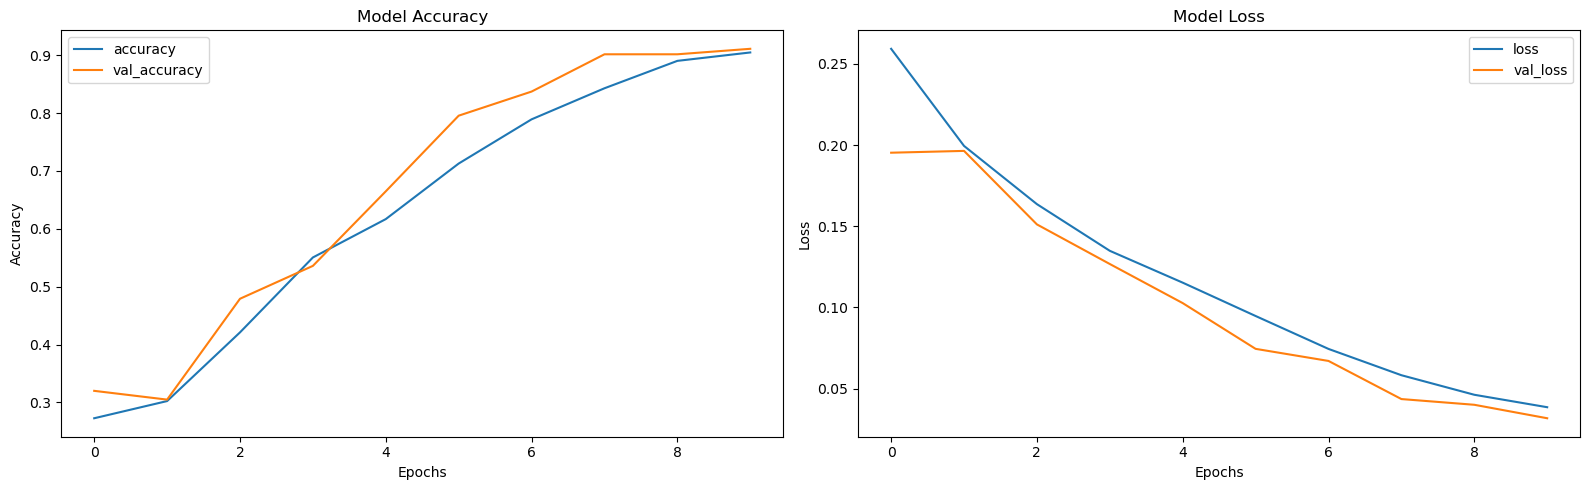

In [44]:
history_df = pd.DataFrame(history.history)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot accuracy and val_accuracy
history_df[['accuracy', 'val_accuracy']].plot(ax=ax1)
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

# Plot loss and val_loss
history_df[['loss', 'val_loss']].plot(ax=ax2)
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(ys, y_pred, normalize="true", values_format=".0%", display_labels=display_labels, xticks_rotation='vertical') plt.show()

# Make Predictions

In [46]:
#input_text= vectorizer('About Citadel Group')
input_text= vectorizer('Basic qualification')

In [47]:
batch= test.as_numpy_iterator().next()

In [48]:
batch_X, batch_Y = test.as_numpy_iterator().next()

In [49]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [50]:
train_df.columns[3:]

Index(['basic qualifications', 'physical demands', 'experience',
       'preferred qualifications', 'schedule', 'additional information',
       'policy', 'licenses  certifications', 'salary', 'job description',
       'disclaimer', 'location', 'education', 'company description',
       'training', 'benefits'],
      dtype='object')

In [51]:
#model.predict(input_text)

In [52]:
res= model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [53]:
res.shape

(16, 16)

In [54]:
input_array = np.array([input_text])

# Define the class labels
class_labels = [
    'basic qualifications', 'physical demands', 'experience',
    'preferred qualifications', 'schedule', 'additional information',
    'policy', 'licenses certifications', 'salary', 'job description',
    'disclaimer', 'location', 'education', 'company description',
    'training', 'benefits'
]

# Get predictions from the model
predictions = model.predict(input_array)

# Get the index of the highest probability
top_prediction_index = np.argmax(predictions, axis=-1)

# Get the corresponding class label
top_prediction_label = class_labels[top_prediction_index[0]]

# Print the top prediction
print(f"Top prediction class label: {top_prediction_label}")
print(f"Top prediction probability: {predictions[0][top_prediction_index[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Top prediction class label: basic qualifications
Top prediction probability: 0.9924547672271729


# Evaluate Model

In [55]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [56]:
pre = Precision()
re = Recall()
acc= CategoricalAccuracy()

In [57]:
'''
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    '''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

2024-07-21 23:46:00.916359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [58]:
#print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.916500985622406, Recall:0.873106062412262, Accuracy:0.06060606241226196


In [59]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
import numpy as np

# Initialize the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Iterate over the test batches
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    
    # Make a prediction
    yhat = model.predict(X_true)
    
    # Get the predicted class (index of the highest probability)
    yhat = np.argmax(yhat, axis=-1)
    
    # Convert y_true to class indices if it is one-hot encoded
    if len(y_true.shape) > 1 and y_true.shape[-1] > 1:
        y_true = np.argmax(y_true, axis=-1)
    
    # Update the metrics
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

# Print the results
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

2024-07-21 23:46:03.453495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

2024-07-21 23:46:06.723598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


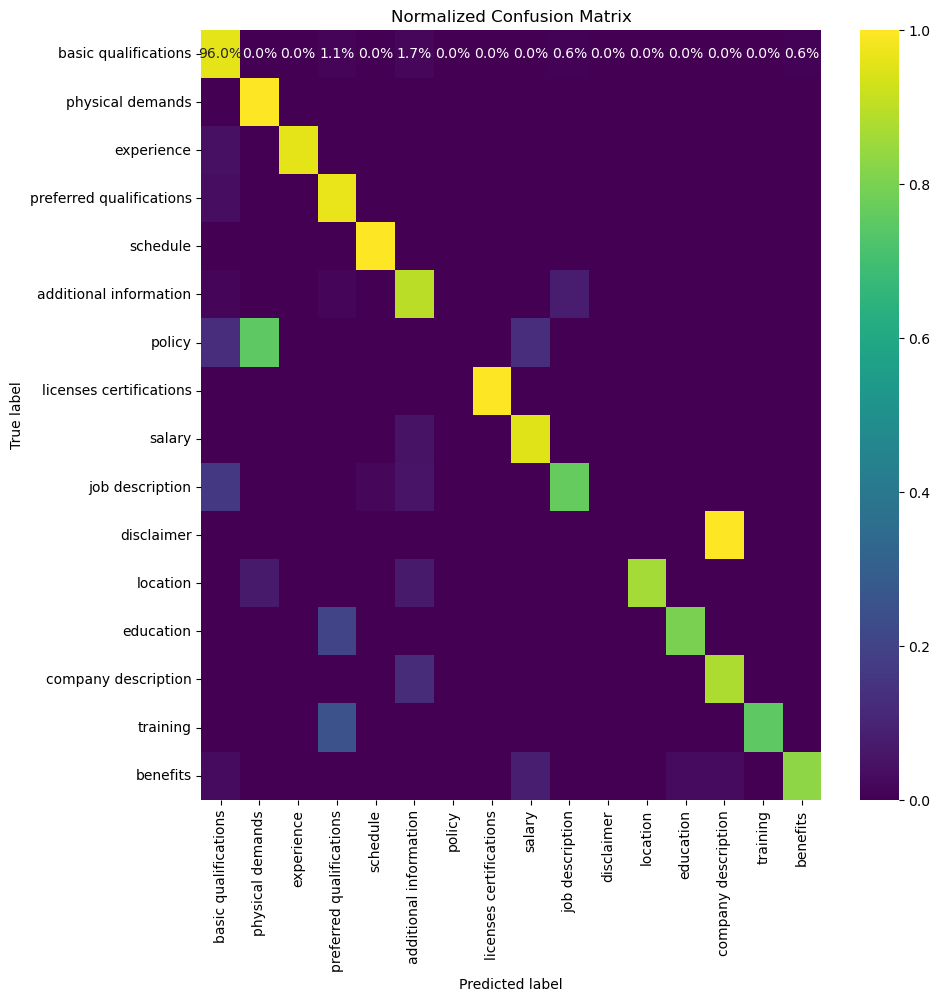

In [60]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Class names
class_names = ['basic qualifications', 'physical demands', 'experience',
               'preferred qualifications', 'schedule', 'additional information',
               'policy', 'licenses certifications', 'salary', 'job description',
               'disclaimer', 'location', 'education', 'company description',
               'training', 'benefits']

# Collect true labels and predictions
true_labels = []
pred_labels = []

# Iterate over the test batches
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    
    # Make a prediction
    yhat = model.predict(X_true)
    
    # Get the predicted class (index of the highest probability)
    yhat = np.argmax(yhat, axis=-1)
    
    # Convert y_true to class indices if it is one-hot encoded
    if len(y_true.shape) > 1 and y_true.shape[-1] > 1:
        y_true = np.argmax(y_true, axis=-1)
    
    # Update the metrics
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    
    # Collect the true labels and predicted labels
    true_labels.extend(y_true)
    pred_labels.extend(yhat)

# Convert to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Print the results
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.01%', xticklabels=class_names, yticklabels=class_names, cmap='viridis', annot_kws={"size": 10})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=90)
plt.show()


In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Assuming you have true_labels and pred_labels from your previous code

# Get unique classes from both true_labels and pred_labels
unique_classes = np.unique(np.concatenate((true_labels, pred_labels)))

# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(true_labels, pred_labels, labels=unique_classes, zero_division=0)

# Create a DataFrame
df = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1-score': f1,
    'support': support
}, index=[class_names[i] for i in unique_classes if i < len(class_names)])

# Calculate averages
micro_avg = precision_recall_fscore_support(true_labels, pred_labels, average='micro', zero_division=0)
macro_avg = precision_recall_fscore_support(true_labels, pred_labels, average='macro', zero_division=0)
weighted_avg = precision_recall_fscore_support(true_labels, pred_labels, average='weighted', zero_division=0)

# Add averages to the DataFrame
df.loc['micro avg'] = micro_avg[:3] + (df['support'].sum(),)
df.loc['macro avg'] = macro_avg[:3] + (df['support'].sum(),)
df.loc['weighted avg'] = weighted_avg[:3] + (df['support'].sum(),)

# Style the DataFrame
def color_rows(row):
    if row.name in ['micro avg', 'macro avg', 'weighted avg']:
        return ['background-color: #222222; color: white'] * len(row)
    return ['background-color: #000000; color: white'] * len(row)

styled_df = df.style.format({
    'precision': '{:.2f}',
    'recall': '{:.2f}',
    'f1-score': '{:.2f}',
    'support': '{:.0f}'
}).set_properties(**{
    'text-align': 'right',
    'padding': '5px'
}).apply(color_rows, axis=1)

# Display the styled DataFrame
display(styled_df)

,precision,recall,f1-score,support
basic qualifications,0.92,0.96,0.94,177
physical demands,0.68,1.00,0.81,15
experience,1.00,0.96,0.98,24
preferred qualifications,0.83,0.97,0.89,30
schedule,0.94,1.00,0.97,17
additional information,0.83,0.90,0.86,67
policy,0.00,0.00,0.00,8
licenses certifications,1.00,1.00,1.00,15
salary,0.83,0.95,0.88,20
job description,0.88,0.76,0.82,55


Precision:

Definition: The ratio of correctly predicted positive instances to the total predicted positive instances.
Formula: True Positives / (True Positives + False Positives)
Interpretation: Out of all the instances the model labeled as positive, how many were actually positive?
Range: 0 to 1 (or 0% to 100%)
High precision indicates a low false positive rate.


Recall (also known as Sensitivity or True Positive Rate):

Definition: The ratio of correctly predicted positive instances to all actual positive instances.
Formula: True Positives / (True Positives + False Negatives)
Interpretation: Out of all the actual positive instances, how many did the model correctly identify?
Range: 0 to 1 (or 0% to 100%)
High recall indicates the model is good at finding all positive instances.


F1-score:

Definition: The harmonic mean of precision and recall.
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Interpretation: A balanced measure that combines both precision and recall.
Range: 0 to 1 (or 0% to 100%)
Useful when you want a single metric that balances both precision and recall.


Support:

Definition: The number of actual occurrences of the class in the specified dataset.
Interpretation: It's simply a count of how many instances of each class are in your dataset.
This is not a performance metric, but it provides context for interpreting the other metrics.
Knowing the support helps understand class imbalance and the reliability of the metrics for each class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

2024-07-21 23:46:09.567876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


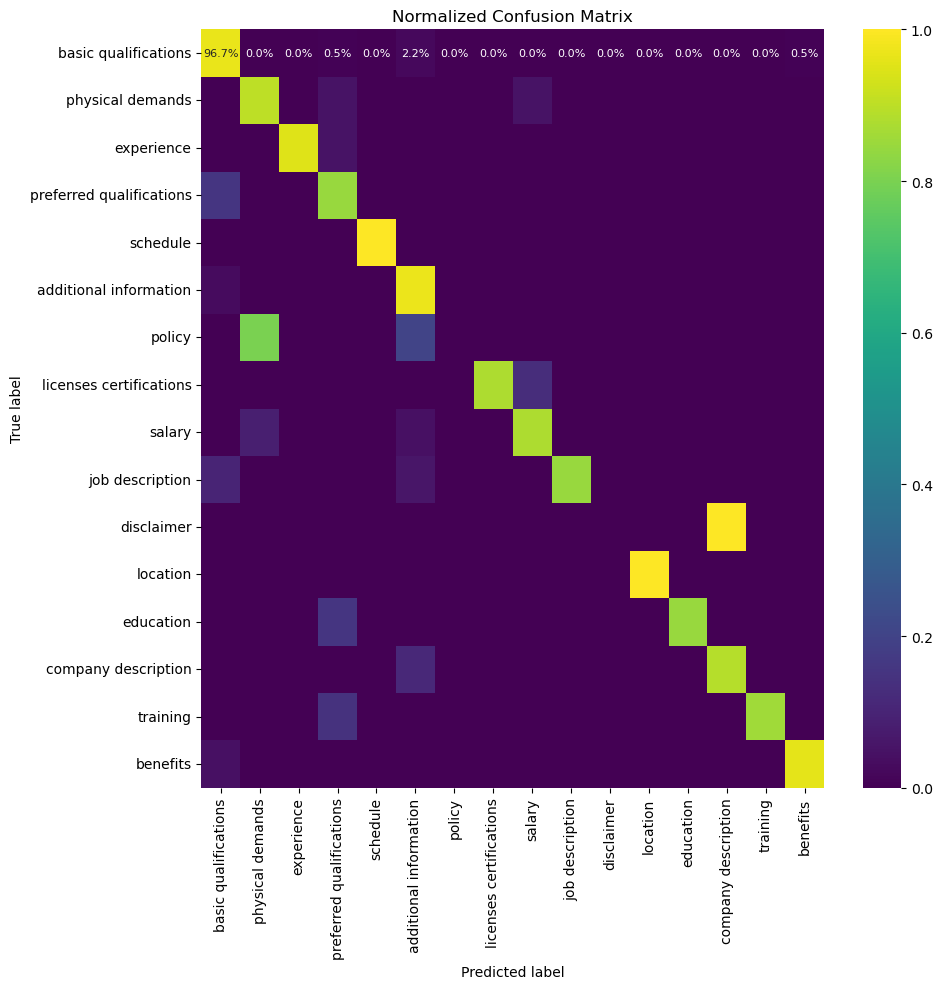

/Users/nathandemssie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathandemssie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathandemssie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
basic qualifications,0.93,0.97,0.95,183
physical demands,0.75,0.90,0.82,20
experience,1.00,0.95,0.98,21
preferred qualifications,0.79,0.85,0.81,26
schedule,1.00,1.00,1.00,17
additional information,0.82,0.97,0.89,65
policy,0.00,0.00,0.00,5
licenses certifications,1.00,0.88,0.93,8
salary,0.91,0.88,0.89,24
job description,1.00,0.85,0.92,71


In [62]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Class names
class_names = ['basic qualifications', 'physical demands', 'experience',
               'preferred qualifications', 'schedule', 'additional information',
               'policy', 'licenses certifications', 'salary', 'job description',
               'disclaimer', 'location', 'education', 'company description',
               'training', 'benefits']

# Collect true labels and predictions
true_labels = []
pred_labels = []

# Iterate over the test batches
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    
    # Make a prediction
    yhat = model.predict(X_true)
    
    # Get the predicted class (index of the highest probability)
    yhat = np.argmax(yhat, axis=-1)
    
    # Convert y_true to class indices if it is one-hot encoded
    if len(y_true.shape) > 1 and y_true.shape[-1] > 1:
        y_true = np.argmax(y_true, axis=-1)
    
    # Update the metrics
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    
    # Collect the true labels and predicted labels
    true_labels.extend(y_true)
    pred_labels.extend(yhat)

# Convert to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Print the results
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

# Check which classes are present in the data
unique_true = np.unique(true_labels)
unique_pred = np.unique(pred_labels)
print("Unique true labels:", unique_true)
print("Unique predicted labels:", unique_pred)

# Compute the confusion matrix
all_classes = np.arange(len(class_names))
cm = confusion_matrix(true_labels, pred_labels, labels=all_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.1%', 
            xticklabels=class_names, yticklabels=class_names, 
            cmap='viridis', annot_kws={"size": 8})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify missing classes
missing_classes = set(range(len(class_names))) - set(unique_true) - set(unique_pred)
if missing_classes:
    print("Missing classes:", [class_names[i] for i in missing_classes])

# Generate classification report
from sklearn.metrics import classification_report

# Generate the report
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)

# Convert to DataFrame for better display
import pandas as pd

df_report = pd.DataFrame(report).transpose()

# Style the DataFrame
styled_df = df_report.style.format({
    'precision': '{:.2f}',
    'recall': '{:.2f}',
    'f1-score': '{:.2f}',
    'support': '{:.0f}'
}).set_properties(**{
    'text-align': 'right',
    'padding': '5px'
})

# Display the styled DataFrame
display(styled_df)